In [26]:
# These two lines are needed if patientFunctions.py is not in this folder
# import sys
# sys.path.insert(0, 'C:/Users/smith/OneDrive/Documents/GitHub/cardiac-amyloidosis/021_classesAndFunctions')

# Importing patient class and functions
import patientFunctions as ptFn
# Importing Libraries
import os
import pandas as pd
import numpy as np
import os
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error, r2_score
# from scipy.optimize import curve_fit


# Directory and File Config

In [27]:
#location of original data
starting_directory = os.getcwd()

# new_dirrectory = 'C:/Users/maega/Documents/3000 PhD/3300_BEAT Labs/Projects/Cardiac-Amyloidosis-Multiple-Myeloma/012 Processed Data/data-2024-06-05'
# # new_dirrectory = '/blue/ferrallm/mcremer/CardiacAmyloidosisMultipleMyeloma/012 Processed Data'

# machine_directory = 'C:/Users/mcremer' #the C and path to the project folder
machine_directory = 'C:/Users/maega' #when working from home machine
storage_directory = 'UFL Dropbox/Maegan Cremer/research-share/Maegan/Projects' #Local, HPG, or dropbox
project_directory = 'Cardiac-Amyloidosis-Multiple-Myeloma' #project folder
project_lv2_directory = '012 Processed Data/data-2024-06-05' #deeper part of project folder

path = os.path.join(machine_directory, storage_directory, 
                    project_directory, project_lv2_directory)

new_dirrectory = path

os.chdir(new_dirrectory)

In [28]:
#updates to directory management
# machine_directory = 'C:/Users/mcremer' #the C and path to the project folder
machine_directory = 'C:/Users/maega' #when working from home machine
storage_directory = 'UFL Dropbox/Maegan Cremer/research-share/Maegan/Projects' #Local, HPG, or dropbox
project_directory = 'Cardiac-Amyloidosis-Multiple-Myeloma' #project folder
project_lv2_directory = '014_Mistic2' #deeper part of project folder

path = os.path.join(machine_directory, storage_directory, 
                    project_directory, project_lv2_directory)

# parent_dir = path
outputDir = path

### File naming for outputs

In [29]:
folderNameHeader = "DFsForSVM"
folderNameCommon = "_EchoAdj_exG01J01_comp-time"
folderNameSuffix = "_20241024_v1"

fileNameHeader_1 = "ALKnownPts"
fileNameHeader_2 = "ALUnknownPts"
fileNameCommon = "_EchoAdj_exG01J01-comp-time"
fileNameSuffix = "_20241024_v1"

folder_data_out = ptFn.makeFolderPathForData(parent_dir=outputDir, folderName_header=folderNameHeader, 
                                        folderName_common=folderNameCommon, folderName_suffix=folderNameSuffix)
# outputToExcel(*, fileName_header=fileNameHeader, fileName_Common= fileNameCommon, 
#               fileName_suffix= fileNameSuffix, folderName = folder_data_out, sheetName= *)

# fig_file_out = outputFiguresPath(fileName_header=fileNameHeader, fileName_mid=**, 
#                                  fileName_suff= fileNameSuffix, parent_dir=parent_dir, folderName=folder_data_out)

folderNameOut = folder_data_out

#file name suffix 
outputSheet_Suffix = fileNameSuffix
outputSheet_common = fileNameCommon

# Penalty Scores Used Throughout For Missing Data and Low Time Resolution

### Length 1 Data

In [30]:
#filler information for fits of 1 point
# one_point_STD = 0
one_point_r2 = -1
# one_point_residual_error = 0

### Length 0 Data

In [31]:
penalty_coef= np.nan
penalty_intercept = np.nan
penalty_R2 = np.nan
penalty_residual_error = np.nan
penalty_fillna = np.nan

penalty_echo = -1

# Importing Data from Patient

In [32]:
#importing patient data as dictionaries of dataframes

#build a dictionary of patients and their values 
ptFiles = ptFn.GetListofPTfiles(new_dirrectory, '.xlsx', 'data')

patientDictAmyloid = {}
patientDictSurvival = {}
patientDictLabs = {}
patientDictEcho = {}
patientDictNotes = {}
patientDictDx = {}
patientDictVitalStatus = {}
patientDictSex = {}
patientDictAge = {}
patientDictChemo = {}
patientDictImmuno = {}
patientDictHeme = {}
patientDictRad = {}
patientDictOther = {}

#loop through the listOfPatients 
for file in ptFiles: 
    pt = ptFn.patient(new_dirrectory, file, 4)
    patientDictAmyloid[pt.ptID] = pt.amyloid_status
    patientDictSurvival[pt.ptID] = pt.survival
    patientDictLabs[pt.ptID] = pt.labsData
    patientDictEcho[pt.ptID] = pt.echoData
    patientDictNotes[pt.ptID] = pt.MDnotes
    patientDictDx[pt.ptID] = pt.dx
    patientDictVitalStatus[pt.ptID] = pt.vitalStatus
    patientDictSex[pt.ptID] = pt.sex
    patientDictAge[pt.ptID] = pt.ageDx
    patientDictChemo[pt.ptID] = pt.ChemoTx
    patientDictImmuno[pt.ptID] = pt.ImmunoTx
    patientDictHeme[pt.ptID] = pt.HemeTx
    patientDictRad[pt.ptID] = pt.RadTx
    patientDictOther[pt.ptID] = pt.OtherTx

# List of Patients by Amyloid Status

In [33]:
#list of patients by amyloid status 

listPositive = []
listNegative = []
listOther = []

ptFn.getListSortedByAmyloid(patientDictAmyloid, listPositive= listPositive,
                       listNegative=listNegative, listOther=listOther)

list_pts_remove = ["K-01", "G-01", "J-01", "L-02"]
for pt in list_pts_remove:
    if pt in listPositive:
        listPositive.remove(pt)
    if pt in listNegative:
        listNegative.remove(pt)
    if pt in listOther:
        listOther.remove(pt)

#first make a copy of the list
listALKnown = listPositive.copy()
#add the negative patients to the list of positive patients
listALKnown.extend(listNegative) 

In [34]:
#length of groups 
print("Length of positive: ", len(listPositive))
print("Length of negative: ", len(listNegative))
print("List of unknown: ", len(listOther))

Length of positive:  21
Length of negative:  23
List of unknown:  19


# Patient Demographic Information

In [35]:
dict_dx_strs = {
    "MGUS" : "MGUS", 
    "MM" : "MM", 
    "Multiple Myeloma" : "MM",
    "MULTIPLE MYELOMA" : "MM" 
    #other values will be set to other
}

dict_AL_codes = {
    "yes" : "yes", 
    "no" : "no", 
    "unk" : "unk"
}

dict_sex_strs = {
    "Male" : "male",
    "MALE": "male", 
    "Female" : "female", 
    "FEMALE" : "female",  
}

#dictionary of dictionaries to help with unifying data inputs
dict_of_uni = {"AL": dict_AL_codes, 
                 "Dx": dict_dx_strs, 
                 "Sex": dict_sex_strs}

dict_of_data = {"AL": patientDictAmyloid, 
                "Dx": patientDictDx, 
                "Sex": patientDictSex}

dict_uniform_pt_AL_Dx_sex = {}

for ptID in list(patientDictDx.keys()):
    listPtValues = []
    for key in list(dict_of_uni.keys()):
        LocalValue = ''
        for code in dict_of_uni[key]:
            if code in dict_of_data[key][ptID]:
                # print(ptID, " code: ", code)
                LocalValue = dict_of_uni[key][code] 
        if LocalValue == '': 
            listPtValues.append("other")
        else:
             listPtValues.append(LocalValue)
    # print("patient values: ", listPtValues)
    dict_uniform_pt_AL_Dx_sex[ptID] = listPtValues

df_all_uniform_AL_dx_sex = pd.DataFrame.from_dict(dict_uniform_pt_AL_Dx_sex, orient='index', columns=["Amyloid Status", "Dx", "Sex"])

# df_all_encoded_AL_dx_sex.columns = ["Amyloid Status", "Dx", "Sex"]

In [36]:
#use the pandas dummy variables to create the encoded values
df_encoded = pd.get_dummies(df_all_uniform_AL_dx_sex, dtype = int)
# print(df_encoded)

In [37]:
#getting age and survival 
df_all_ages = pd.DataFrame.from_dict(patientDictAge, orient= 'index', columns= ['Age'])
df_all_survival = pd.DataFrame.from_dict(patientDictSurvival, orient='index', columns= ['Survival (in months)'])

#combining for demographics

df_all_demographics = pd.concat([df_encoded, df_all_ages, df_all_survival], axis= 1)

# Treatment Information

In [38]:
#collecting information about treatments patient has recieved

#each condition appends 2 numbers
#first number is a boolean if the patient has data
#the second number is the total number of treatments the patient has had.

#list of dictionaries 
pt_Tx_dict_to_iterate = [patientDictChemo, patientDictImmuno, patientDictHeme, patientDictRad, patientDictOther]

dictPt_Tx_Summary = {}

for ptID in list(patientDictAge.keys()): 
    #get the treatment information for that patient
    ptTxList = [] 
    for tx in pt_Tx_dict_to_iterate:
        if type(tx[ptID]) != bool: 
            ptTxList.append(1)
            #get the length of the data
            numb_txs = len(tx[ptID])
            ptTxList.append(numb_txs)
        else:
            ptTxList.append(0)
            ptTxList.append(0)

    dictPt_Tx_Summary[ptID] = ptTxList

df_all_tx_summary = pd.DataFrame.from_dict(dictPt_Tx_Summary, orient='index', columns= ["ChemoTx", "ChemoTx Number", "ImmunoTx", "ImmunoTx Number", "HemeTx", "HemeTx Number", 
"RadTx", "RadTx Number", "OtherTx", "OtherTx Number"])
# df_all_tx_summary.columns = ["ChemoTx", "ChemoTx Number", "ImmunoTx", "ImmunoTx Number", "HemeTx", "HemeTx Number", 
# "RadTx", "RadTx Number", "OtherTx", "OtherTx Number"]

# List of Labs to Use for Keywords

In [39]:
columnsToUse = ["Ferritin Result(ng/mL)","Troponin-T","NT Pro BNP (B-Type Natriuretic Peptide)","Beta-2-Microglobulin Result",
                "ALT Result(U/L)","LDH Result(U/L)","Creatinine Result(mg/dL)","Potassium Result(mmol/L)","Glucose Result",
                "total CO2 Result","Sodium Result(mmol/L)","Calcium Result(mg/dL)","Chloride Result(mmol/L)","BUN Result(mg/dL)",
                "Platelet Count Result(k/uL)","Hemoglobin Result","MCV Result","MCHC Result","MCH Result(pg)","HCT Result",
                'RBC Result','WBC Result(k/uL)','Albumin Result(gm/dL)','Pct. Mono Result','Pct. Neutrophil Result',
                'Neutrophil Result','Monocyte Result','Nucleated RBC Result','Pct. Immature Gran Auto Result','AST Result(U/L)',
                'Total Serum Protein Result','Kappa Free Light Chains Result (mg/L)','Serum Electrophoresis Gamma Result','Albumin Electrophoresis Result',
                'Serum Electrophoresis Alpha 1 Result','Serum Electrophoresis Alpha 2 Result','Serum Electrophoresis Beta Result']

In [40]:
#dictionary for the filtered data and the list of columnNames
#this enables filtering of the patient data as its own block of code
dictOfFilteredLabs = {}

#other input values to set outside of loop 
x_column_name = "RelTime(Days)"
#creating dictionaries for all patients in the dirrectory 

#also collects the column names of interest 

for ptID in (patientDictLabs.keys()):
    #to collect and filter the patient labs into a dictionary
    df_Labs = patientDictLabs[ptID]

    orig_columns = df_Labs.columns

    #filter the patient labs
    columnNames = ptFn.FilterList(orig_columns, keyWords_primary = columnsToUse,
                             omit = ['Method', 'ABO', 'Dohle', "Toxic Granulation", "D Dimer Result",
                                        "Urine Color Result", "Urine Leukocyte Esterase Result",
                                        "Urine Nitrite Result", "Urinalysis Squamous Epithelial Cells Result (/hpf)",
                                        "(/hpf)", "Hep B", "Hep B Surf Ag Result", "Hep C", "Hep C Ab Screen Result",
                                        "Hypersegmentation Result", "HCG Result (Serum)", "Coombs Test Result",
                                        "HIV Result", "Urine Glucose Result(mg/dL)", "Pct. Atypical Lymphocyte Result",
                                        "Indirect Bilirubin Result", "Atypical Lymphocyte Result"])
    
    
    testNames = [x_column_name]
    testNames.extend(columnNames) #addition of time label


    ptLabs_results= df_Labs[testNames] #new data frame of just results

    #troponin contains strings which mess up plotting 
    df_Labs_results_2 = ptLabs_results
    df_Labs_results_2["Troponin-T"] = ptLabs_results["Troponin-T"].apply(lambda x: 0 if isinstance(x, str) else x)
    df_Labs_results_2["NT Pro BNP (B-Type Natriuretic Peptide)"] = ptLabs_results["NT Pro BNP (B-Type Natriuretic Peptide)"].apply(lambda x: 0 if isinstance(x, str) else x)

    ptLabs_results_2 = df_Labs_results_2
    dictOfFilteredLabs[ptID] = ptLabs_results_2

C:\Users\maega\AppData\Local\Temp\ipykernel_35624\2332753053.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Labs_results_2["Troponin-T"] = ptLabs_results["Troponin-T"].apply(lambda x: 0 if isinstance(x, str) else x)
C:\Users\maega\AppData\Local\Temp\ipykernel_35624\2332753053.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Labs_results_2["NT Pro BNP (B-Type Natriuretic Peptide)"] = ptLabs_results["NT Pro BNP (B-Type Natriuretic Peptide)"].apply(lambda x: 0 if isinstance(x, str) else x)
C:\U

# Collect Echo Dates and Convert to Days

In [41]:
EchoTimeColumn ='time from diagnosis to first echo (months)'
MRItimeColumn = 'time from dagnosis to MRI (months)'
imagingDates = {}
dict_imagingDates_Days = {}
for pt in patientDictEcho:
    ptEchoData = patientDictEcho[pt]
    patientEchoDate = ptEchoData.at[0,EchoTimeColumn]
    patientMRIDate = ptEchoData.at[0,MRItimeColumn]

    print(pt , " echo date: ", patientEchoDate, " type ",type(patientEchoDate) )
    print(pt, " MRI date: ", patientMRIDate, " type ", type(patientMRIDate))
    if type(patientEchoDate) != str and np.isnan(patientEchoDate) == False:
        # np.isnan(patientEchoDate) == False and type(patientEchoDate) != str:
        imagingDates[pt] = patientEchoDate
        #convert from months to days
        dict_imagingDates_Days[pt] = patientEchoDate * 30

    #only if the patient doesn't have an echo date do you check for an MRI date
    elif type(patientMRIDate) != str and np.isnan(patientMRIDate) == False:
        imagingDates[pt] = patientMRIDate
        #convert from months to days
        dict_imagingDates_Days[pt] = patientMRIDate * 30

A-02  echo date:  6.333333333333333  type  <class 'numpy.float64'>
A-02  MRI date:  7  type  <class 'numpy.int64'>
A-03  echo date:  5.5  type  <class 'numpy.float64'>
A-03  MRI date:  nan  type  <class 'numpy.float64'>
B-01  echo date:  230.5666666666667  type  <class 'numpy.float64'>
B-01  MRI date:  nan  type  <class 'numpy.float64'>
B-02  echo date:  4.433333333333334  type  <class 'numpy.float64'>
B-02  MRI date:  nan  type  <class 'numpy.float64'>
B-03  echo date:  2.333333333333333  type  <class 'numpy.float64'>
B-03  MRI date:  8.133333333333333  type  <class 'numpy.float64'>
C-01  echo date:  1.666666666666667  type  <class 'numpy.float64'>
C-01  MRI date:  2  type  <class 'numpy.int64'>
C-02  echo date:  3.233333333333333  type  <class 'numpy.float64'>
C-02  MRI date:  nan  type  <class 'numpy.float64'>
C-03  echo date:  -0.03333333333333333  type  <class 'numpy.float64'>
C-03  MRI date:  -0.03333333333333333  type  <class 'numpy.float64'>
D-01  echo date:  165.1333333333333 

# Collect Data Nearest to Date of Echo

In [42]:
EchoTimeColumn ='time from diagnosis to first echo (months)'
MRItimeColumn = 'time from dagnosis to MRI (months)'
imagingDates = {}
dict_imagingDates_Days = {}
for pt in patientDictEcho:
    ptEchoData = patientDictEcho[pt]
    patientEchoDate = ptEchoData.at[0,EchoTimeColumn]
    patientMRIDate = ptEchoData.at[0,MRItimeColumn]

    print(pt , " echo date: ", patientEchoDate, " type ",type(patientEchoDate) )
    print(pt, " MRI date: ", patientMRIDate, " type ", type(patientMRIDate))
    if type(patientEchoDate) != str and np.isnan(patientEchoDate) == False:
        # np.isnan(patientEchoDate) == False and type(patientEchoDate) != str:
        imagingDates[pt] = patientEchoDate
        #convert from months to days
        dict_imagingDates_Days[pt] = patientEchoDate * 30

    #only if the patient doesn't have an echo date do you check for an MRI date
    elif type(patientMRIDate) != str and np.isnan(patientMRIDate) == False:
        imagingDates[pt] = patientMRIDate
        #convert from months to days
        dict_imagingDates_Days[pt] = patientMRIDate * 30


A-02  echo date:  6.333333333333333  type  <class 'numpy.float64'>
A-02  MRI date:  7  type  <class 'numpy.int64'>
A-03  echo date:  5.5  type  <class 'numpy.float64'>
A-03  MRI date:  nan  type  <class 'numpy.float64'>
B-01  echo date:  230.5666666666667  type  <class 'numpy.float64'>
B-01  MRI date:  nan  type  <class 'numpy.float64'>
B-02  echo date:  4.433333333333334  type  <class 'numpy.float64'>
B-02  MRI date:  nan  type  <class 'numpy.float64'>
B-03  echo date:  2.333333333333333  type  <class 'numpy.float64'>
B-03  MRI date:  8.133333333333333  type  <class 'numpy.float64'>
C-01  echo date:  1.666666666666667  type  <class 'numpy.float64'>
C-01  MRI date:  2  type  <class 'numpy.int64'>
C-02  echo date:  3.233333333333333  type  <class 'numpy.float64'>
C-02  MRI date:  nan  type  <class 'numpy.float64'>
C-03  echo date:  -0.03333333333333333  type  <class 'numpy.float64'>
C-03  MRI date:  -0.03333333333333333  type  <class 'numpy.float64'>
D-01  echo date:  165.1333333333333 

In [43]:
# #create dictionary for storing the instance of patient labs nearest to the echo date and most complete
# dict_labs_EchoAdj = {}

# for ptID in (dictOfFilteredLabs.keys()):

#     if ptID in dict_imagingDates_Days: 
#         #get echo value in days
#         imagingDate = dict_imagingDates_Days[ptID]

#         #get patient lab data 
#         ptData = dictOfFilteredLabs[ptID]

#         #create copy 
#         ptDataCopy = ptData.copy()

#         #find the time difference between lab and echo date
#         ptDataCopy['time_diff']= [np.absolute(time - imagingDate) for time in ptDataCopy["RelTime(Days)"]]

#         #find the completeness of data in the row
#         ptDataCopy['completeness'] = ptDataCopy.notna().astype(int).sum(axis=1)

#         #sort by 'time_diff' and then 'completeness'
#         df_sorted = ptDataCopy.sort_values(by= ['time_diff', 'completeness'], ascending = [True, False])

#         #exporting these values to a sheet so that they can be compared later 
#         ptFn.outputToExcel(df_data = df_sorted, fileName_header= "AllPts", fileName_Common= fileNameCommon + "_sorted", fileName_suffix= outputSheet_Suffix,
#             parent_dir= outputDir, folderName=folderNameOut, sheetName= ptID)

#         #drop columns
#         df_sorted.drop(['time_diff', 'completeness'], axis = 1, inplace = True)

#         #pull the top row
#         nearestLabs = df_sorted.iloc[0]

#         #adding to dictionary 
#         dict_labs_EchoAdj[ptID] = nearestLabs
    
#     if ptID not in dict_imagingDates_Days:
#         #get patient lab data 
#         ptData = dictOfFilteredLabs[ptID]

#         #create copy 
#         ptDataCopy = ptData.copy()

#         #find the completeness of data in the row
#         ptDataCopy['completeness'] = ptDataCopy.notna().astype(int).sum(axis=1)

#         #sort by 'time_diff' and then 'completeness'
#         df_sorted = ptDataCopy.sort_values(by= ['completeness'], ascending = [False])

#         #exporting these values to a sheet so that they can be compared later 
#         ptFn.outputToExcel(df_data = df_sorted, fileName_header= "AllPts", fileName_Common= fileNameCommon + "_sorted", fileName_suffix= outputSheet_Suffix,
#             parent_dir= outputDir, folderName=folderNameOut, sheetName= ptID)

#         #drop columns
#         df_sorted.drop(['completeness'], axis = 1, inplace = True)

#         #pull the top row
#         nearestLabs = df_sorted.iloc[0]

#         #adding to dictionary 
#         dict_labs_EchoAdj[ptID] = nearestLabs

# df_labs_EchoAdj = pd.DataFrame.from_dict(dict_labs_EchoAdj, orient='index')

In [44]:
#create dictionary for storing the instance of patient labs nearest to the echo date and most complete
dict_labs_EchoAdj = {}

for ptID in (dictOfFilteredLabs.keys()):

    if ptID in dict_imagingDates_Days: 
        #get echo value in days
        imagingDate = dict_imagingDates_Days[ptID]

        #get patient lab data 
        ptData = dictOfFilteredLabs[ptID]

        #create copy 
        ptDataCopy = ptData.copy()

        #find the time difference between lab and echo date
        ptDataCopy['time_diff']= [np.absolute(time - imagingDate) for time in ptDataCopy["RelTime(Days)"]]

        #find the completeness of data in the row
        ptDataCopy['completeness'] = ptDataCopy.notna().astype(int).sum(axis=1)

        #sort by 'time_diff' and then 'completeness'
        # df_sorted = ptDataCopy.sort_values(by= ['time_diff', 'completeness'], ascending = [True, False])
        df_sorted = ptDataCopy.sort_values(by= ['completeness', 'time_diff'], ascending = [False, True])


        #exporting these values to a sheet so that they can be compared later 
        ptFn.outputToExcel(df_data = df_sorted, fileName_header= "AllPts", fileName_Common= fileNameCommon + "_sorted", fileName_suffix= outputSheet_Suffix,
            parent_dir= outputDir, folderName=folderNameOut, sheetName= ptID)

        #drop columns
        df_sorted.drop(['time_diff', 'completeness'], axis = 1, inplace = True)

        #pull the top row
        nearestLabs = df_sorted.iloc[0]

        #adding to dictionary 
        dict_labs_EchoAdj[ptID] = nearestLabs
    
    if ptID not in dict_imagingDates_Days:
        #get patient lab data 
        ptData = dictOfFilteredLabs[ptID]

        #create copy 
        ptDataCopy = ptData.copy()

        #find the completeness of data in the row
        ptDataCopy['completeness'] = ptDataCopy.notna().astype(int).sum(axis=1)

        #sort by 'time_diff' and then 'completeness'
        df_sorted = ptDataCopy.sort_values(by= ['completeness'], ascending = [False])

        #exporting these values to a sheet so that they can be compared later 
        ptFn.outputToExcel(df_data = df_sorted, fileName_header= "AllPts", fileName_Common= fileNameCommon + "_sorted", fileName_suffix= outputSheet_Suffix,
            parent_dir= outputDir, folderName=folderNameOut, sheetName= ptID)

        #drop columns
        df_sorted.drop(['completeness'], axis = 1, inplace = True)

        #pull the top row
        nearestLabs = df_sorted.iloc[0]

        #adding to dictionary 
        dict_labs_EchoAdj[ptID] = nearestLabs

df_labs_EchoAdj = pd.DataFrame.from_dict(dict_labs_EchoAdj, orient='index')

# Concat Data into Single Sheet

### Concat Data

In [45]:
df_output_summary = pd.concat([df_all_demographics, df_all_tx_summary, df_labs_EchoAdj], axis =1)
df_output_summary.index.name = 'DeID'

### Fill in Missing Data with Penalty Scores

In [46]:
#fill in missing data 
df_output_summary_filled = df_output_summary.fillna(penalty_echo, inplace=False)

### Slice the Data by Amyloid Status

In [47]:
#for amyloid status known patients
df_ALKnown_summary = df_output_summary_filled.loc[listALKnown]
df_ALOther_summary = df_output_summary_filled.loc[listOther]

ptFn.outputToExcel(df_data = df_ALKnown_summary, fileName_header= "AL-KnownPts", fileName_Common= fileNameCommon + "_1Sheet", fileName_suffix= outputSheet_Suffix,
        parent_dir= outputDir, folderName=folderNameOut, sheetName= "ALL")

ptFn.outputToExcel(df_data = df_ALOther_summary, fileName_header= "AL-UnknownPts", fileName_Common= fileNameCommon + "_1Sheet", fileName_suffix= outputSheet_Suffix,
        parent_dir= outputDir, folderName=folderNameOut, sheetName= "ALL")

# Data Visualization

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib as mpl
#setting figure resolution: 
mpl.rcParams['figure.dpi'] = 300

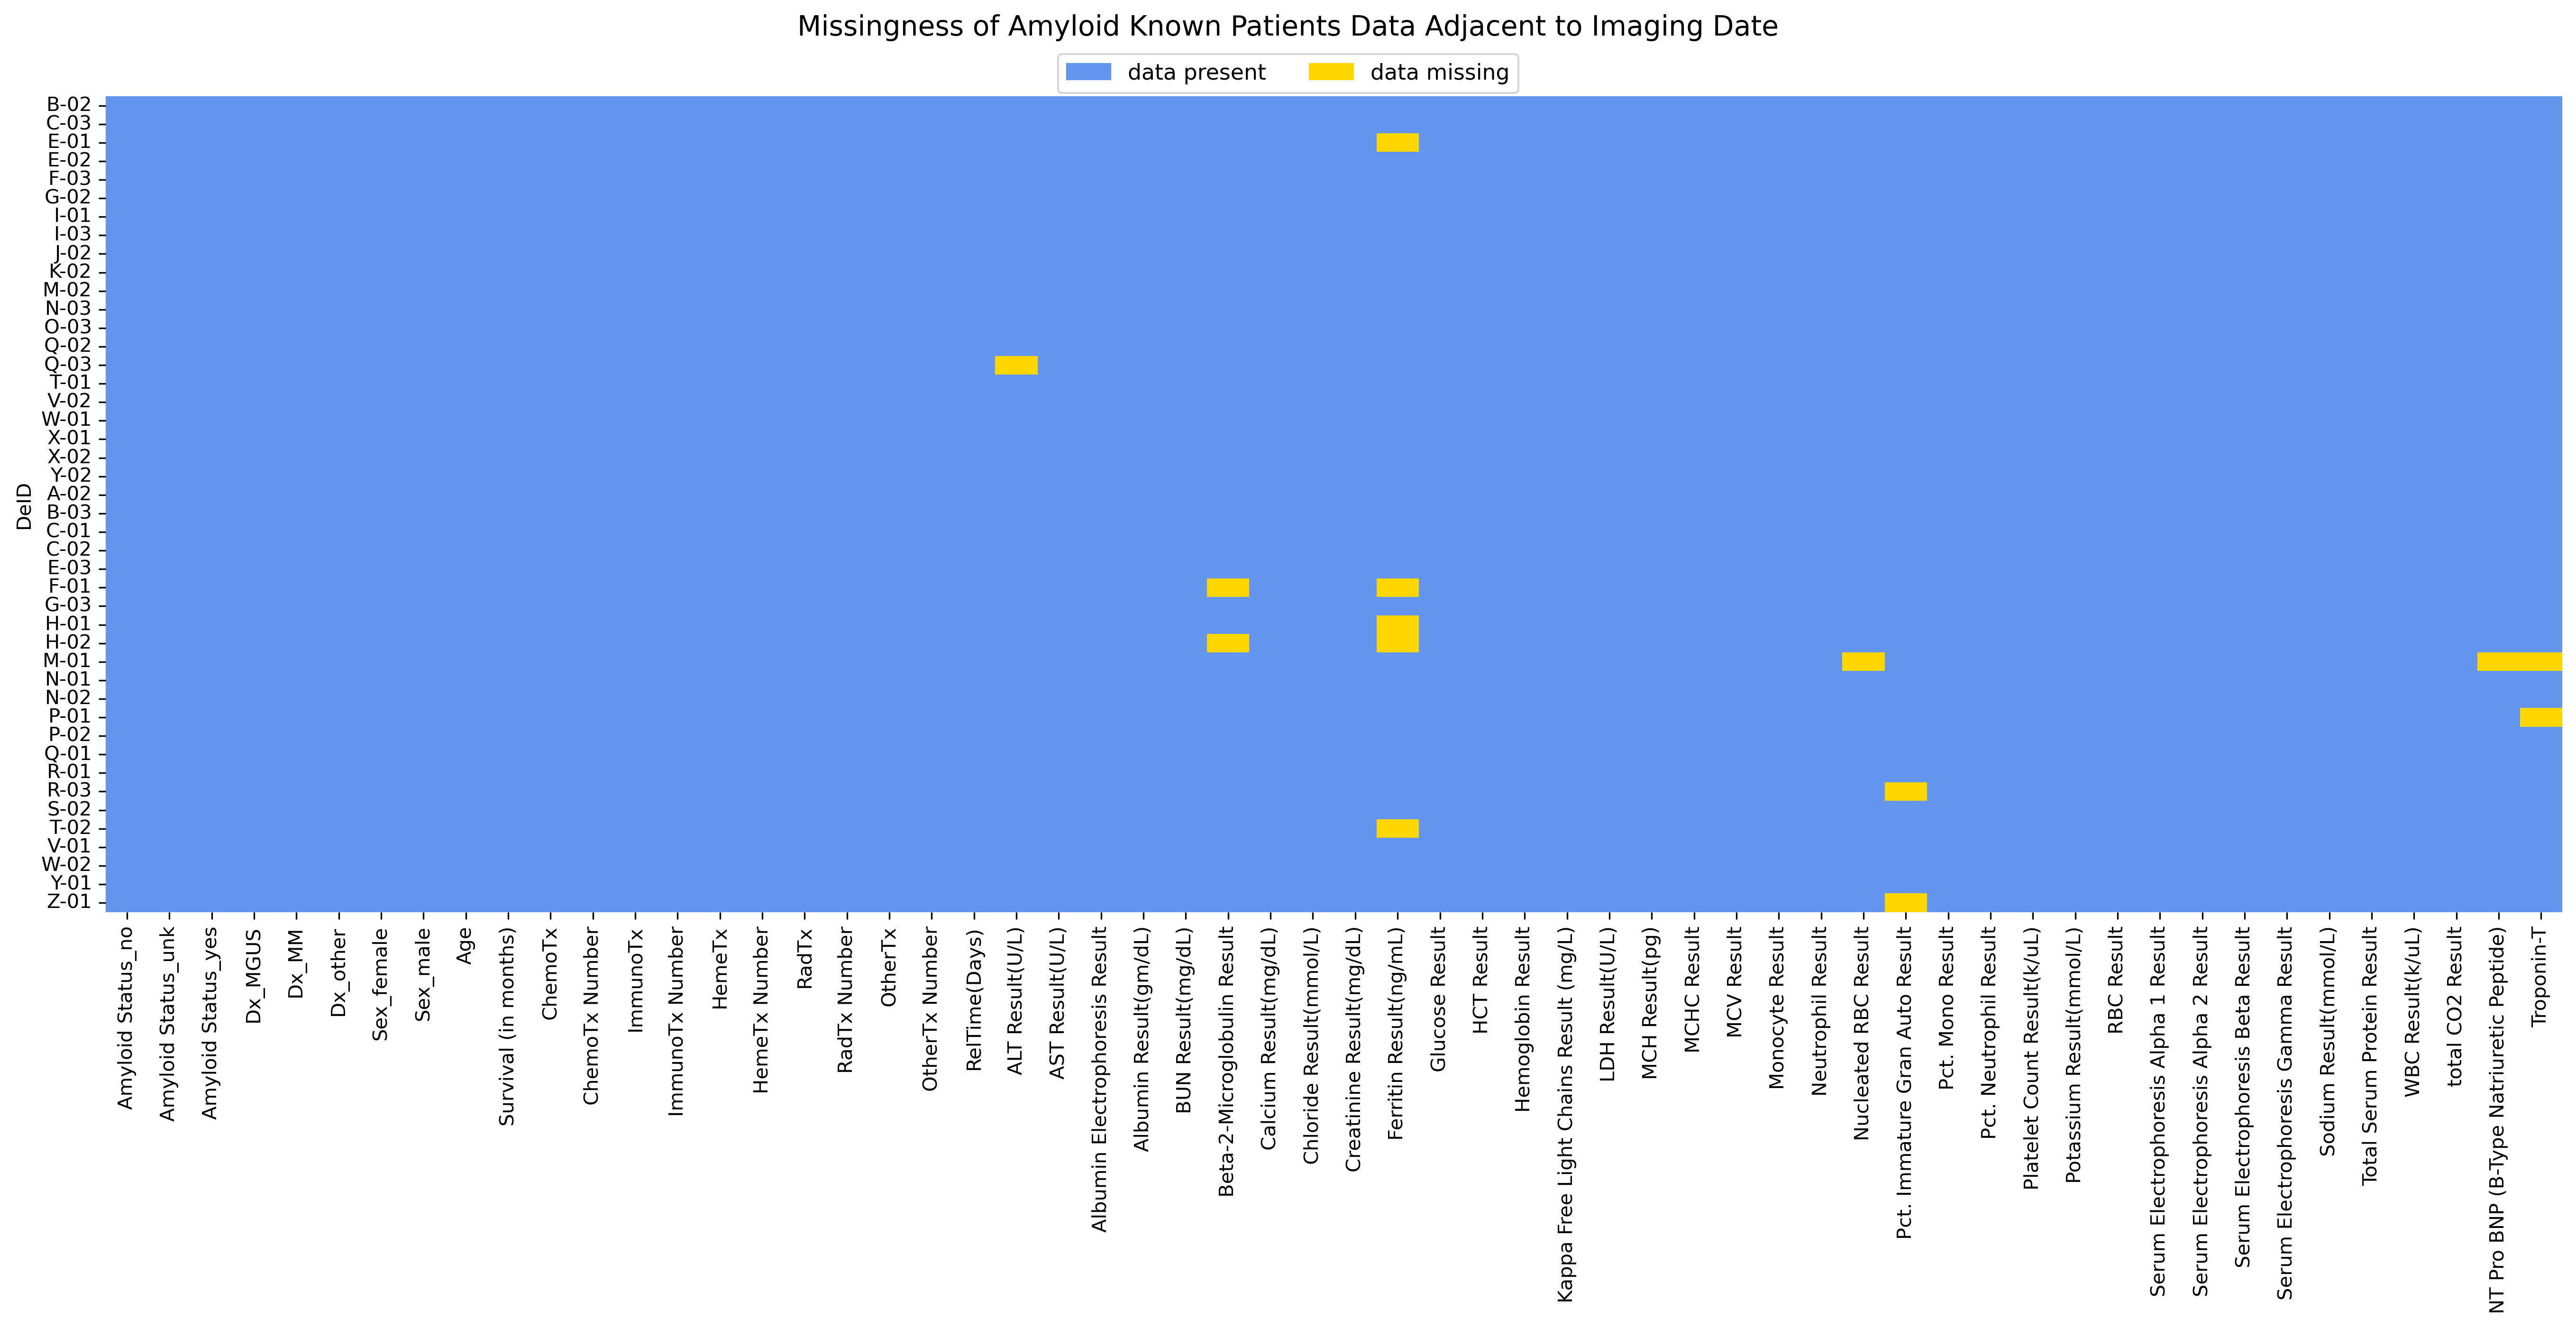

In [49]:
# plt.figure(figsize = (18,8))
fig, ax = plt.subplots(figsize = (18,9), layout = 'constrained')
df_ALKnown_summary_na = df_output_summary.loc[listALKnown]

colours = ['cornflowerblue', 'gold'] 
sns.heatmap(df_ALKnown_summary_na.isnull(), cmap = sns.color_palette(colours), cbar = False)

#adding patches 
patch1 = mpatches.Patch(color = 'cornflowerblue', label = 'data present')
patch2 = mpatches.Patch(color = 'gold', label = 'data missing')

fig.suptitle('Missingness of Amyloid Known Patients Data Adjacent to Imaging Date', fontsize = 14, y = 1.02 )
fig.legend(loc= 'outside upper center' , handles= [patch1,patch2], fontsize = 11, ncol = 2, borderaxespad = 2.5)

# ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)

plt.show()

fig_file_out = ptFn.outputFiguresPath(fileName_header=fileNameHeader_1, fileName_mid='_matrix_missingness_', 
                                 fileName_suff= fileNameSuffix, parent_dir=outputDir, folderName=folder_data_out)
fig.savefig(fig_file_out, bbox_inches = 'tight')

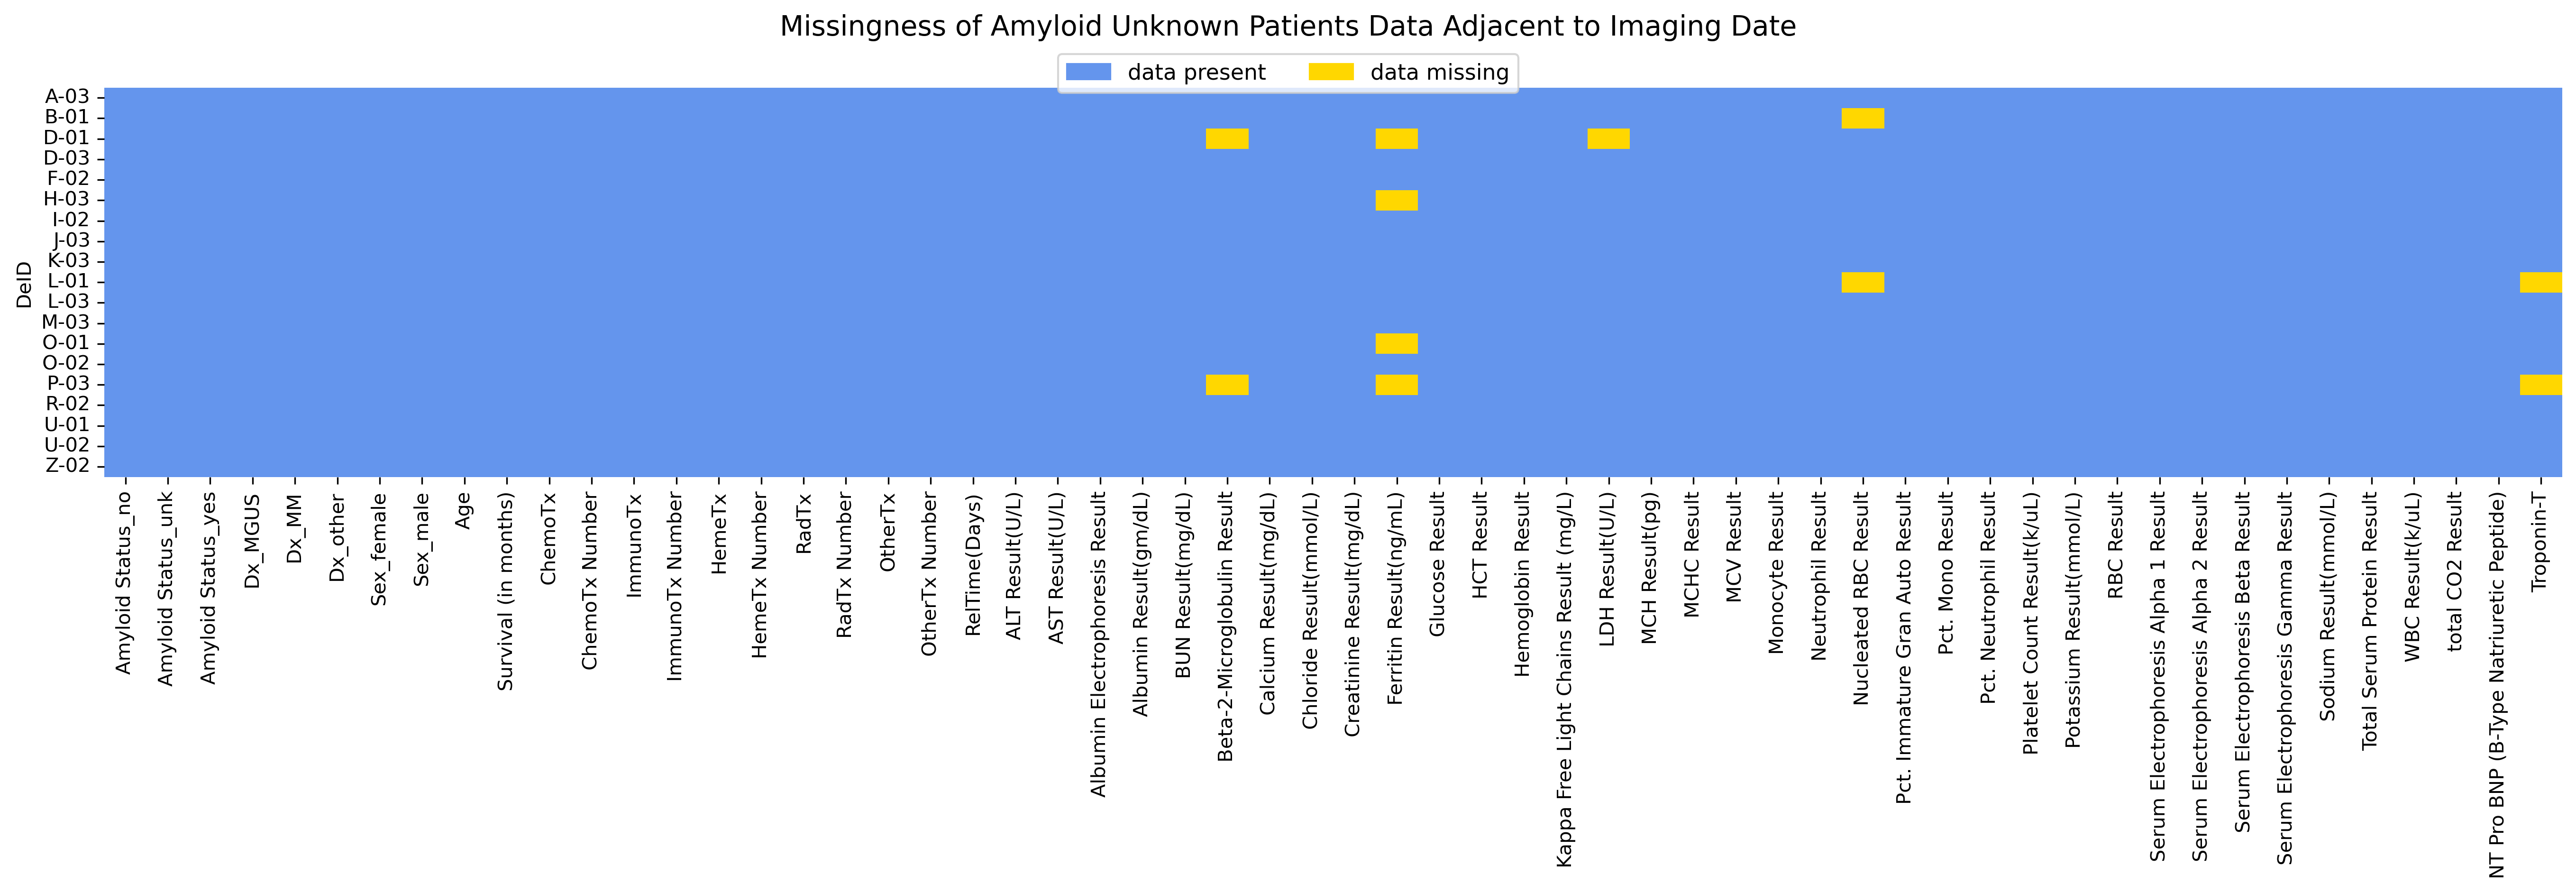

In [50]:
# plt.figure(figsize = (18,8))
fig, ax = plt.subplots(figsize = (18,6), layout = 'constrained')
df_ALUnknown_summary_na = df_output_summary.loc[listOther]

colours = ['cornflowerblue', 'gold'] 
sns.heatmap(df_ALUnknown_summary_na.isnull(), cmap = sns.color_palette(colours), cbar = False)

#adding patches 
patch1 = mpatches.Patch(color = 'cornflowerblue', label = 'data present')
patch2 = mpatches.Patch(color = 'gold', label = 'data missing')

fig.suptitle('Missingness of Amyloid Unknown Patients Data Adjacent to Imaging Date', fontsize = 14, y = 1.02 )
fig.legend(loc= 'outside upper center' , handles= [patch1,patch2], fontsize = 11, ncol = 2, borderaxespad = 2.5)

plt.show()

fig_file_out = ptFn.outputFiguresPath(fileName_header=fileNameHeader_2, fileName_mid='_matrix_missingness_', 
                                 fileName_suff= fileNameSuffix, parent_dir=outputDir, folderName=folder_data_out)
fig.savefig(fig_file_out, bbox_inches = 'tight')